In [ ]:
import numpy as np
import pandas as pd
from PIL import Image


In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/MLHW4/HW4_data.zip" # FILE PATH

In [ ]:
X_train = []
for i in range(10000):
    X_train.append(np.asarray(Image.open("HW4_data/public/train_{i}.jpg".format(i=i))))

df_train = pd.read_csv("HW4_data/public/train_label.csv", index_col=0)

In [ ]:
X_val = []
for i in range(1000):
    X_val.append(np.asarray(Image.open("HW4_data/public/val_{i}.jpg".format(i=i))))

df_val = pd.read_csv("HW4_data/public/val_label.csv", index_col=0)

In [ ]:
X_test = []
for i in range(1500):
    X_test.append(np.asarray(Image.open("HW4_data/private/test_{i}.jpg".format(i=i))))

df_test_demo = pd.read_csv("HW4_data/private/test_demo.csv", index_col=0)

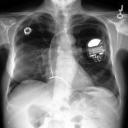

train_0.jpg


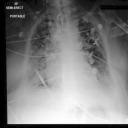

train_1.jpg


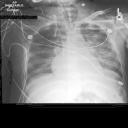

train_2.jpg


In [ ]:
import IPython.display as display
for i in range(3):
    image_path = "HW4_data/public/train_"+ str(i) +".jpg"
    display.display(display.Image(image_path, width=128, height=128))
    print(image_path.split('/')[-1])

In [ ]:
flat = [item for sublist in X_train for item in sublist for i in item]

In [ ]:
len(flat)

163840000

In [ ]:
X_trainnormal = X_train
for i in range(10000):
  X_trainnormal[i] = X_train[i]/255.0

X_valnormal = X_val
for i in range(1000):
  X_valnormal[i] = X_val[i]/255.0

X_testnormal = X_test
for i in range(1500):
  X_testnormal[i] = X_test[i]/255.0

In [ ]:
xtrain = np.array(X_trainnormal)
xval = np.array(X_valnormal)
xtest = np.array(X_testnormal)

In [ ]:
xtrain.shape

(10000, 128, 128)

In [ ]:
xtrain[0]

array([[0.00784314, 0.00784314, 0.00784314, ..., 0.        , 0.01960784,
        0.02352941],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.        , 0.        ,
        0.        ],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.02352941, 0.03137255,
        0.01568627],
       ...,
       [0.        , 0.        , 0.03529412, ..., 0.00392157, 0.00392157,
        0.01568627],
       [0.        , 0.        , 0.03137255, ..., 0.        , 0.00392157,
        0.01568627],
       [0.00392157, 0.        , 0.03137255, ..., 0.        , 0.00392157,
        0.01568627]])

In [ ]:
ytrain = df_train['Edema']
yval = df_val['Edema']

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(xtrain, ytrain, epochs=4,
                    validation_data=(xval, yval))

Epoch 1/4


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 219s 697ms/step - loss: 0.4707 - accuracy: 0.7664 - val_loss: 0.4286 - val_accuracy: 0.7790
Epoch 2/4
313/313 [==============================] - 217s 693ms/step - loss: 0.4125 - accuracy: 0.8176 - val_loss: 0.4072 - val_accuracy: 0.8300
Epoch 3/4
313/313 [==============================] - 219s 701ms/step - loss: 0.3883 - accuracy: 0.8243 - val_loss: 0.3635 - val_accuracy: 0.8430
Epoch 4/4
313/313 [==============================] - 219s 701ms/step - loss: 0.3677 - accuracy: 0.8356 - val_loss: 0.3680 - val_accuracy: 0.8340


In [ ]:
def f1_loss(y_true, y_pred):
    y_true = K.cast(y_true, 'float')
    y_pred = K.cast(y_pred, 'float')
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

In [ ]:
results = model.evaluate(xval, yval, verbose=0)

In [ ]:
results


[0.3679842948913574, 0.8339999914169312]

In [ ]:
output = model.predict(xval)

In [ ]:
yvalpred = tf.argmax(output, axis=1)

In [ ]:
yvalpred

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
    

In [ ]:
dfyval = pd.DataFrame(yval)
dfyval

,Edema
0,0
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,0


In [ ]:
dfyvalpred = pd.DataFrame(yvalpred)

In [ ]:
dfyvalpred

,0
0,0
1,0
2,0
3,0
4,1
...,...
995,0
996,1
997,1
998,0


In [ ]:
import sklearn.metrics

In [ ]:
ypred = model.predict(xtest)
ypred = tf.argmax(ypred, axis=1)

In [ ]:
f1 = sklearn.metrics.classification_report(dfyval, dfyvalpred)

In [ ]:
f1

'              precision    recall  f1-score   support\n\n           0       0.91      0.85      0.88       718\n           1       0.67      0.80      0.73       282\n\n    accuracy                           0.83      1000\n   macro avg       0.79      0.82      0.81      1000\nweighted avg       0.85      0.83      0.84      1000\n'

In [ ]:
output_path = '108062172_basic_prediction.csv'
test_pred = pd.DataFrame( {'Edema':ypred} )
test_pred.to_csv(output_path, index = True)

In [ ]:
model.save("HW4basic.h5")

In [ ]:
  from sklearn.metrics import confusion_matrix
  confmat = confusion_matrix(y_true=dfyval, y_pred=dfyvalpred)
  TN, FN, FP, TP = confmat[0][0], confmat[0][1], confmat[1][0], confmat[1][1]
  pre, rec = (TP/(FP+TP)), (TP/(FN+TP))
  f1 = 2 * ((pre*rec)/(pre+rec))

In [ ]:
f1

0.7305194805194806